# Insurance Data Analysis

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import copy

In [10]:
data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Imarticus\linear_regression\Linear Regression Project\Linear Regression Project\Dataset\insurance.csv")

In [12]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data Cleaning and Preparation

In [19]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## EDA

In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


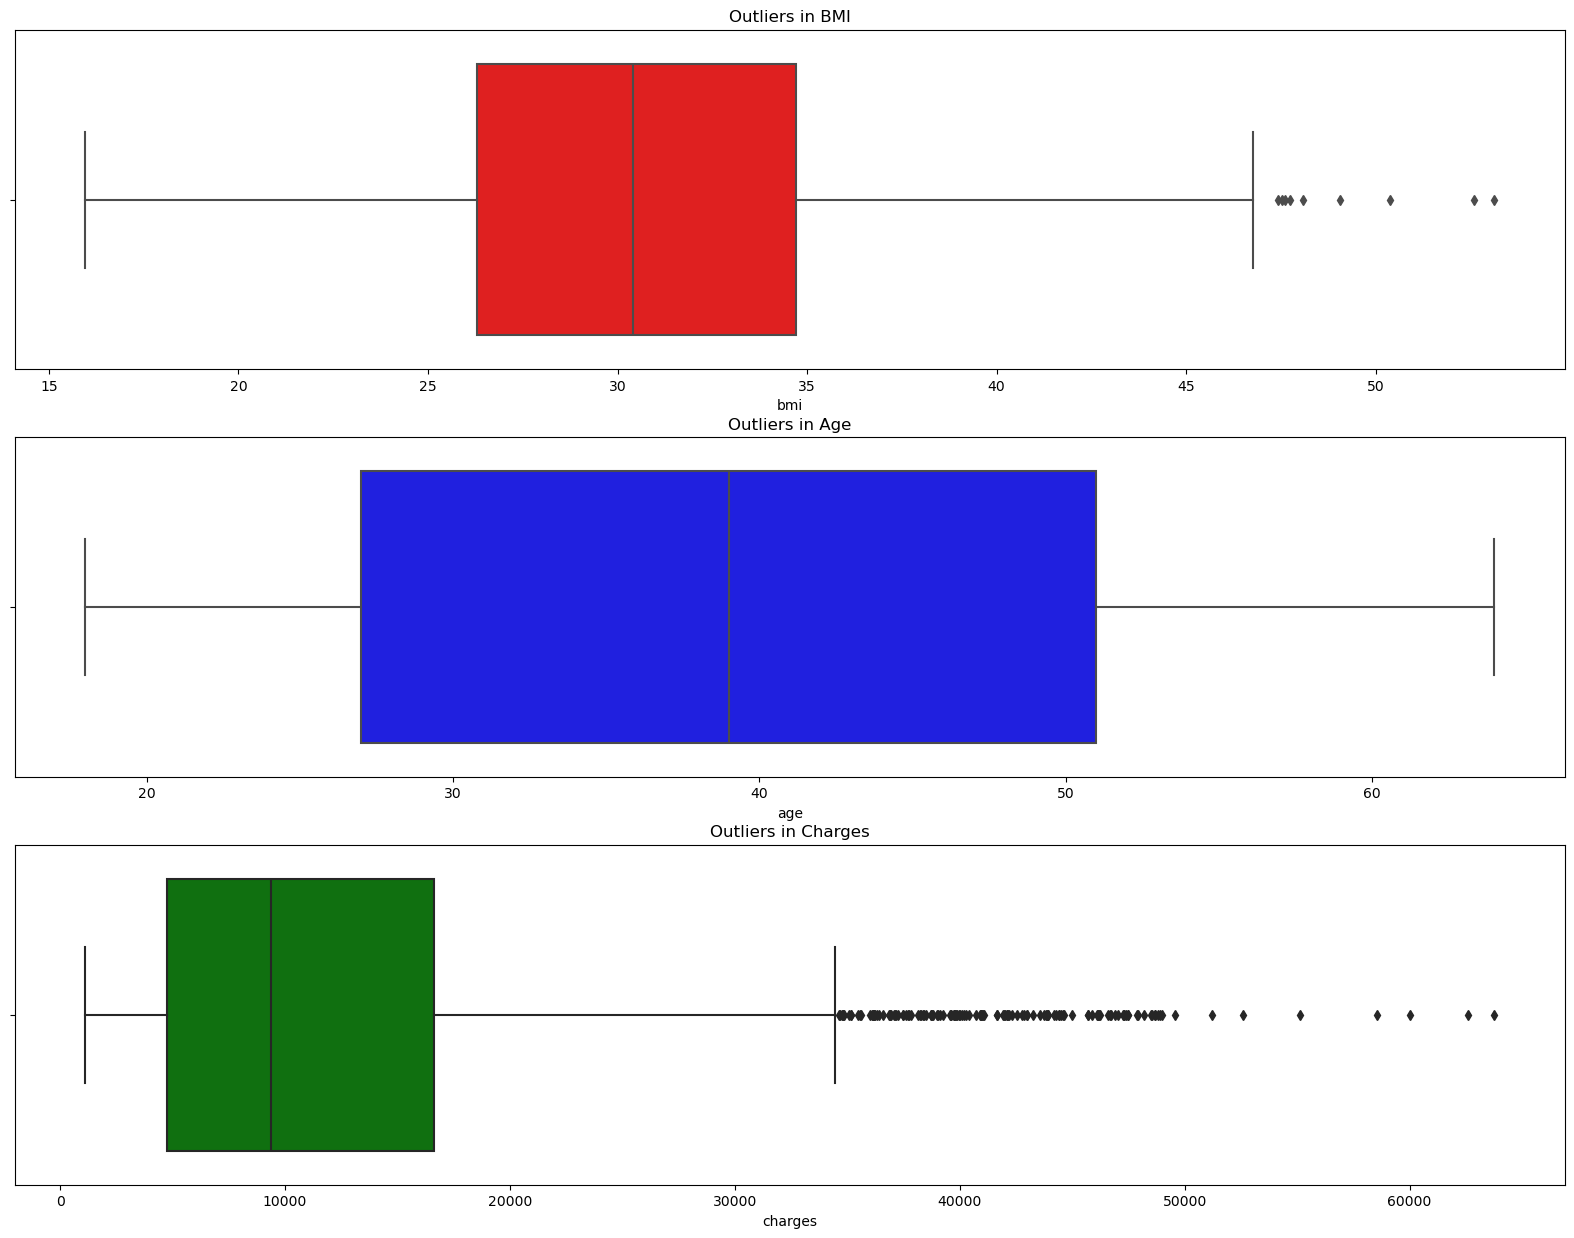

In [40]:
# checking outliers
plt.figure(figsize=(20,15))
plt.subplot(3, 1, 1)
sns.boxplot(x=data.bmi,color='red').set_title('Outliers in BMI')

plt.subplot(3, 1, 2)
sns.boxplot(x=data.age,color='blue').set_title('Outliers in Age')

plt.subplot(3, 1, 3)
sns.boxplot(x=data.charges,color='green').set_title('Outliers in Charges')

plt.show()

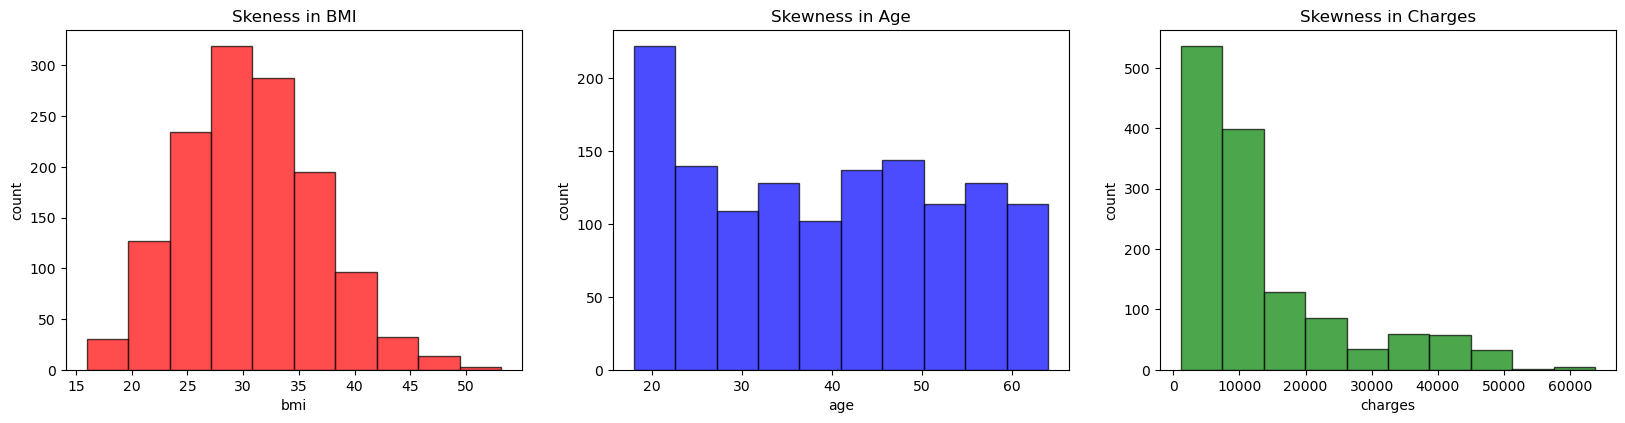

In [46]:
plt.figure(figsize=(20,15))

plt.subplot(3, 3, 1)
plt.hist(data.bmi, color='red',edgecolor='black',alpha = 0.7)
plt.xlabel('bmi')
plt.ylabel('count')
plt.title('Skeness in BMI')

plt.subplot(3, 3, 2)
plt.hist(data.age,color='blue',edgecolor='black',alpha=0.7)
plt.xlabel('age')
plt.ylabel('count')
plt.title('Skewness in Age')

plt.subplot(3, 3, 3)
plt.hist(data.charges, color='green',edgecolor='black',alpha=0.7)
plt.xlabel('charges')
plt.ylabel('count')
plt.title('Skewness in Charges')
plt.show()

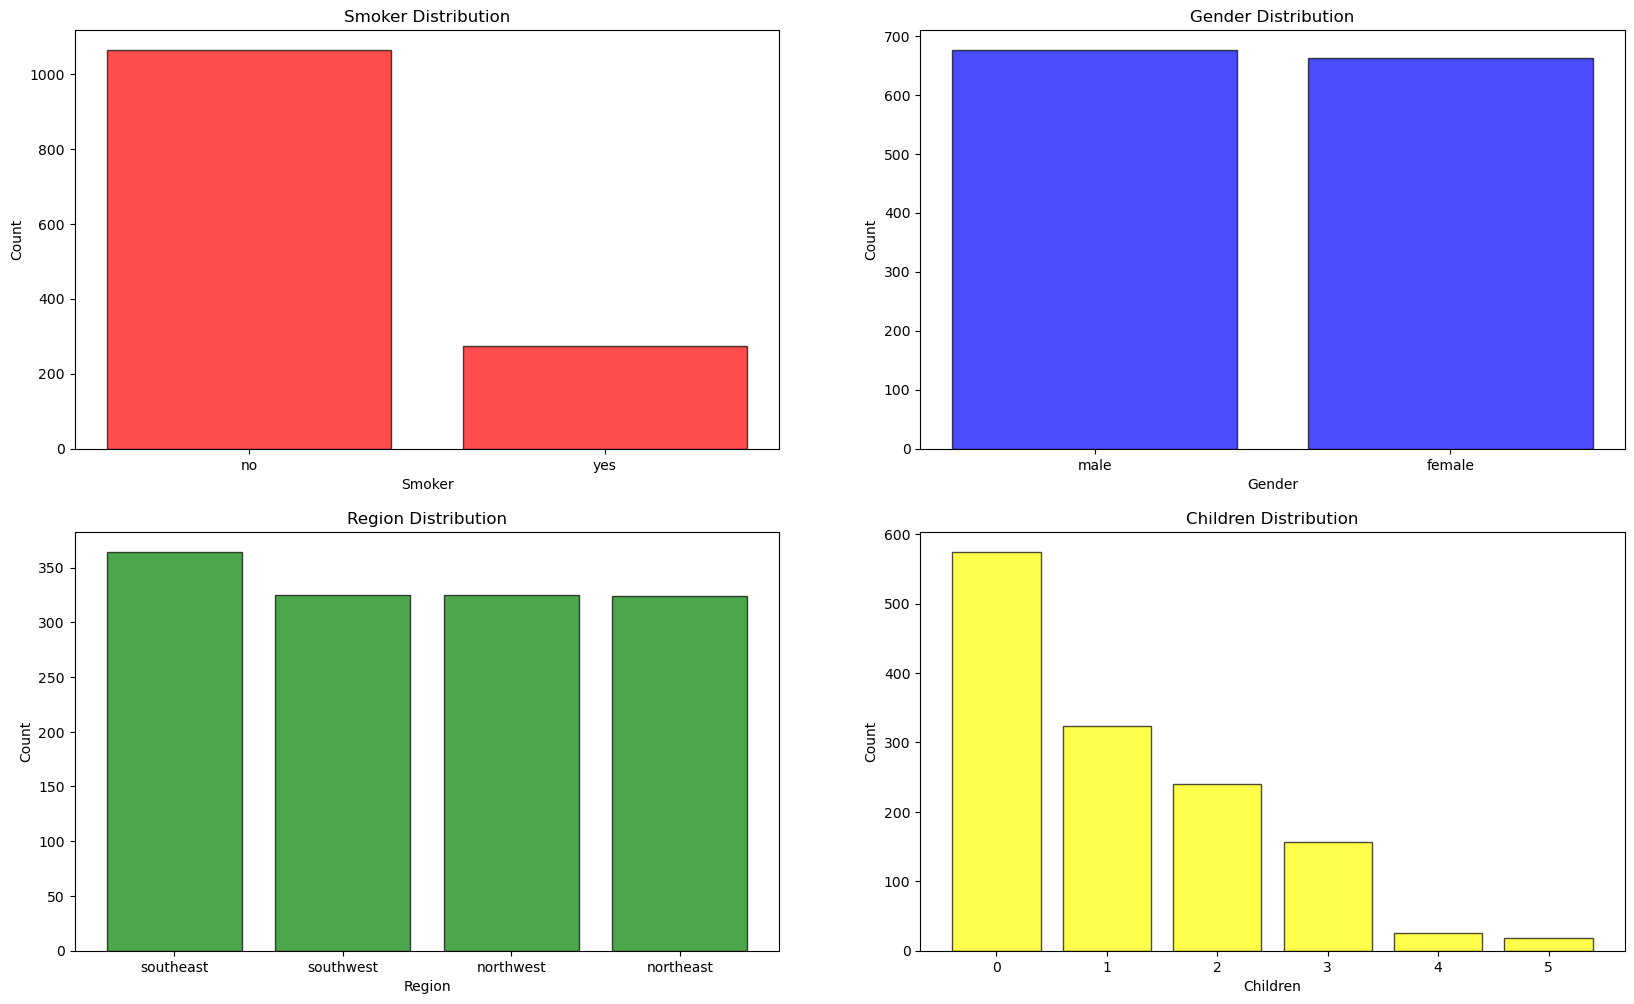

In [48]:
plt.figure(figsize=(20,25))

x = data.smoker.value_counts().index
y = [data.smoker.value_counts()[i] for i in x]

plt.subplot(4, 2, 1)
plt.bar(x, y, align='center', color='red', edgecolor='black', alpha= 0.7)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker Distribution')

x1 = data.sex.value_counts().index
y1 = [data.sex.value_counts()[j] for j in x1]

plt.subplot(4, 2, 2)
plt.bar(x1, y1, align='center', color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

x2 = data.region.value_counts().index
y2 = [data.region.value_counts()[k] for k in x2]

plt.subplot(4, 2, 3)
plt.bar(x2, y2, align='center', color='green',edgecolor='black',alpha=0.7)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')

x3 = data.children.value_counts().index
y3 = [data.children.value_counts()[l] for l in x3]

plt.subplot(4, 2, 4)
plt.bar(x3, y3, align='center', color='yellow',edgecolor='black',alpha=0.7)
plt.xlabel('Children')
plt.ylabel('Count')
plt.title('Children Distribution')

plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

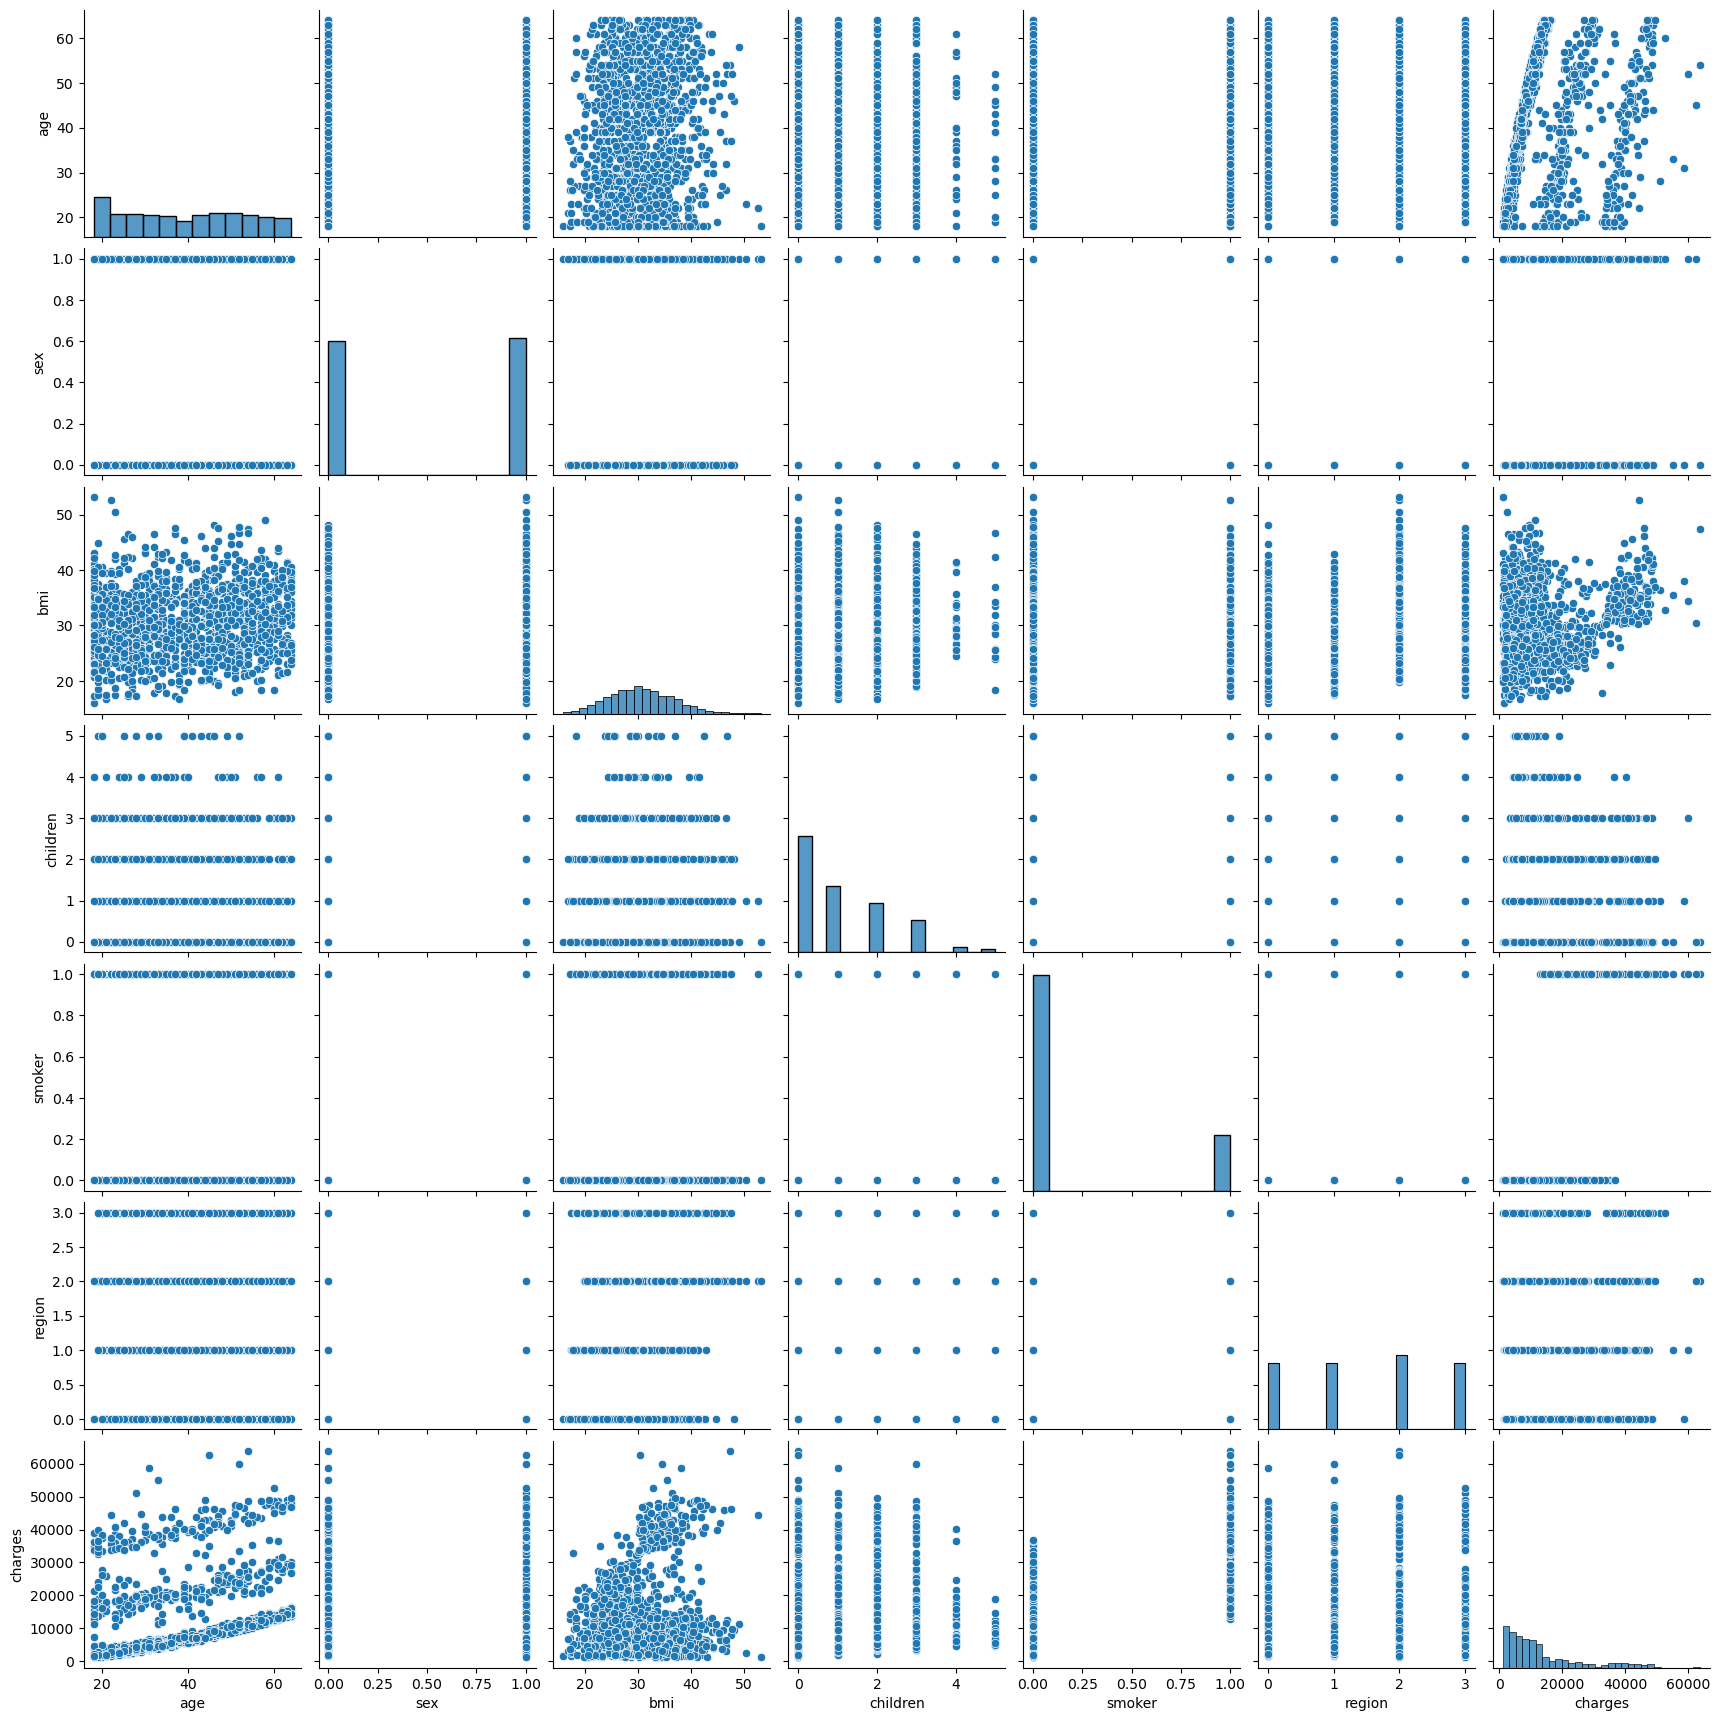

In [54]:
# Label encoding the variables before doing a pairplot because pairplot ignores strings
data_encoded = copy.deepcopy(data)
data_encoded.loc[:,['sex','smoker','region']] = data_encoded.loc[:,['sex','smoker','region']].apply(LabelEncoder().fit_transform)

sns.pairplot(data_encoded)
plt.show()

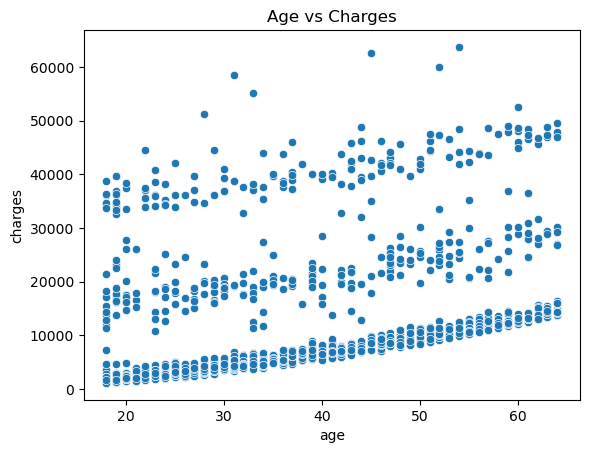

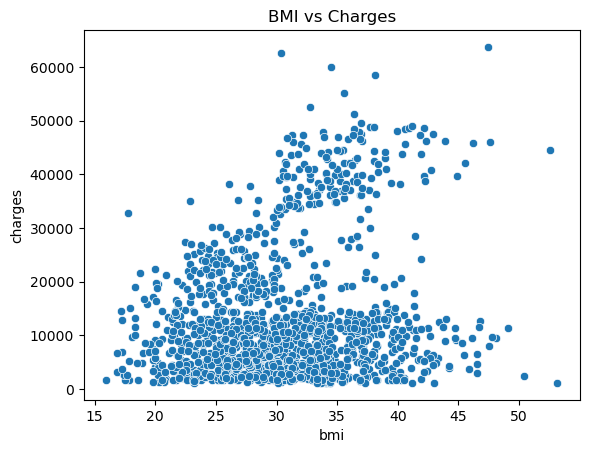

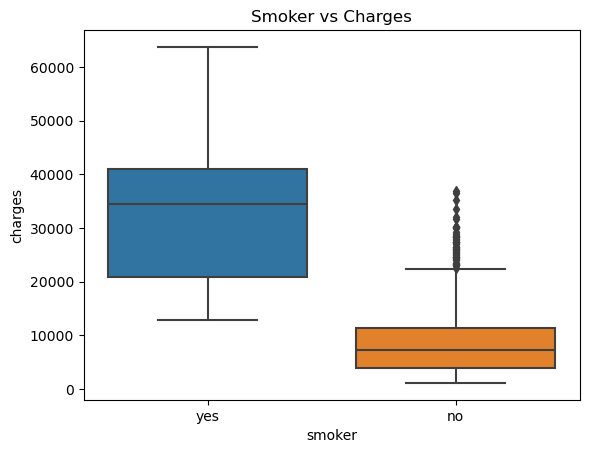

In [59]:
# Scatter plot of 'age' vs 'charges'
sns.scatterplot(x='age', y='charges', data=data)
plt.title('Age vs Charges')
plt.show()

# Scatter plot of 'bmi' vs 'charges'
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('BMI vs Charges')
plt.show()

# Box plot of 'smoker' vs 'charges'
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Smoker vs Charges')
plt.show()


In [78]:
# Convert categorical variables to numeric
data = pd.get_dummies(data, drop_first=True)


In [80]:
x = data.drop('charges',axis=1)
y = data['charges']

In [82]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [86]:
y_pred = model.predict(x_test)

In [94]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

Mean Squared Error: 33596915.851361446
R-Squared: 0.7835929767120724


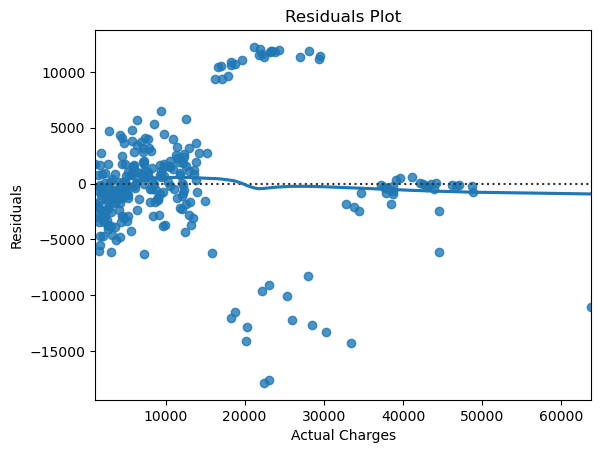

In [96]:
# Residual plot
sns.residplot(x=y_test, y=y_pred, lowess=True)
plt.title('Residuals Plot')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.show()
